In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
# Create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")


In [6]:
# Declare a Base
Base = automap_base()
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(most_recent)


('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= '2016-08-23').filter(Measurements.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns = ['Date','Precipitation'])
precip_df.set_index('Date',inplace=True)

# Sort the dataframe by date
precip_df.sort_values(by = ['Date'],inplace=True)

# Dropping the missing values.
precip_df.dropna(inplace=True)


precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


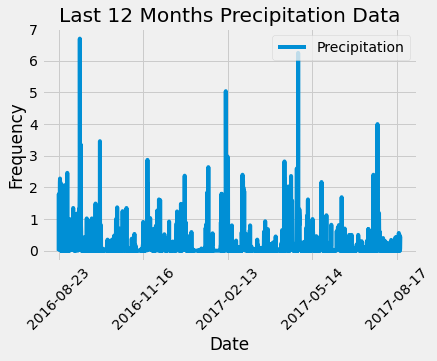

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot=45)
# Adding labeling for clarity.
plt.legend(loc = "upper right")
plt.ylabel("Frequency")
plt.title("Last 12 Months Precipitation Data")
plt.show()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(precip_df.describe(),2)

,Precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurements.station.distinct())).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()

print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Saving the most active stations name for later reference.
most_active = active_stations[0][0]

# Filtering out all the temperatures
station_temps = session.query(Measurements.tobs).filter(Measurements.station == most_active).all()

# Using a list comprehension to pull the queried temperature values into a list.
temps_list = [x[0] for x in station_temps]

max_temp = max(temps_list)
min_temp = min(temps_list)
avg_temp = round(np.average(temps_list))

print(f'The most active station, {most_active}, had a maximum recorded temperature of {max_temp}, minimum of {min_temp}, and average of {avg_temp}')

The most active station, USC00519281, had a maximum recorded temperature of 85.0, minimum of 54.0, and average of 72


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Alternative method - this is cleaner, but I think less obvious what it's doing and I end up wanting the temps list later to make a graph.

session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).filter(Measurements.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

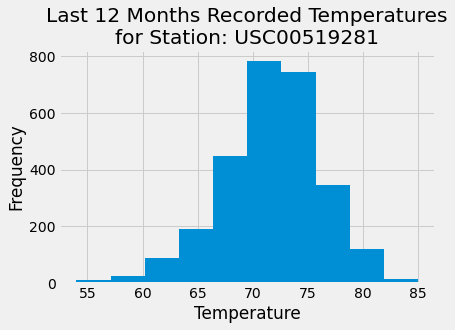

In [38]:
# Using the most active station id query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Pulling the temperature data from the station to make the list
plt.hist(temps_list)

# Adding labeling for clarity.
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title(f'Last 12 Months Recorded Temperatures\nfor Station: {most_active}')
plt.show()

# Close session

In [39]:
# Close the Session
session.close()